In [1]:
# Importando a biblioteca a ser utilizada

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [2]:
# Importando a base de dados a ser utilizada

base = pd.read_csv(r'D:\Lucas\Estudos\Ciência de dados\28.Prática em Python\dados\AirPassengers.csv', sep = ',')
base.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [3]:
print(base.dtypes)

Month          object
#Passengers     int64
dtype: object


In [4]:
#convertendo string para data

dateparse = lambda dates: datetime.strptime(dates, '%Y-%m')

base = pd.read_csv(r'D:\Lucas\Estudos\Ciência de dados\28.Prática em Python\dados\AirPassengers.csv', sep = ',', parse_dates = ['Month'], index_col = 'Month', date_parser = dateparse)

base.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [5]:
print(base.dtypes)

#Passengers    int64
dtype: object


In [ ]:
base.index

In [ ]:
#Criando um array para ser usado como série temporal

ts = base['#Passengers']

ts

In [8]:
#visualizar registro específico:
ts[1]

118

In [9]:
#visuualizar por data
ts['1955-01']

Month
1955-01-01    242
Name: #Passengers, dtype: int64

In [10]:
#visuualizar por data específica
ts[datetime(1955,1,1)]

242

In [ ]:
#Visualização por intervalos
ts['1950-01' : '1955-01']

In [ ]:
#Visualização por ano
ts['1955']

In [13]:
#Valores máximos (data)
ts.index.max()

Timestamp('1960-12-01 00:00:00')

In [14]:
#Valores máximos (data)
ts.index.min()

Timestamp('1949-01-01 00:00:00')

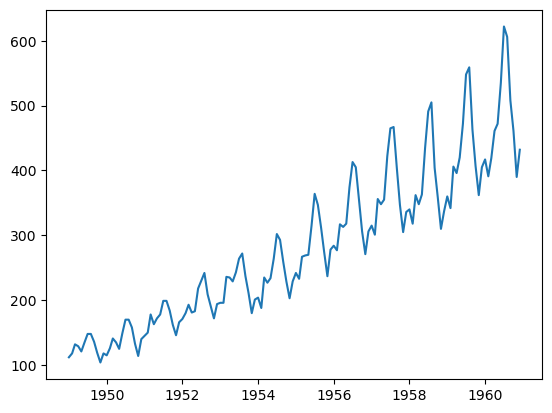

In [15]:
# Plotando a série temporal
plt.plot(ts)
plt.show()

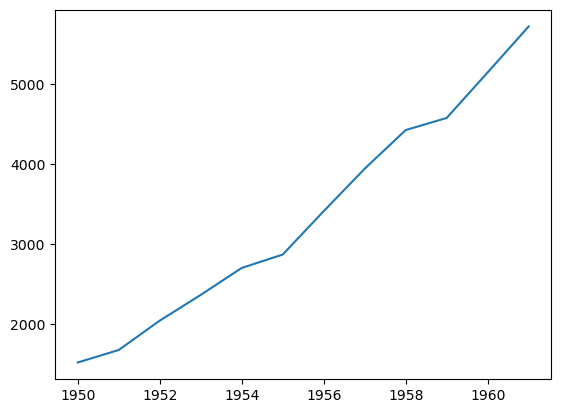

In [16]:
# Plotando a série temporal por ano

ts_ano = ts.resample('Y').sum()

plt.plot(ts_ano)

plt.show()

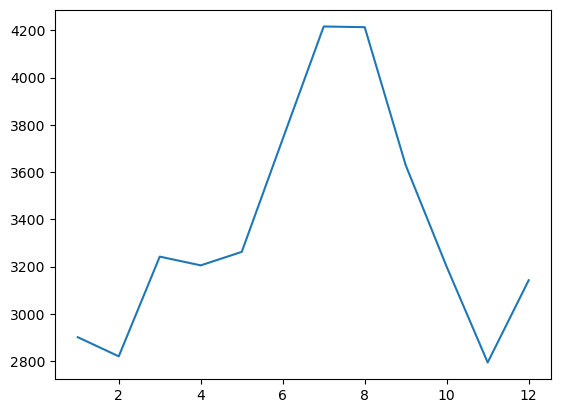

In [17]:
# Plotando a série temporal por mês

ts_mes = ts.groupby([lambda x: x.month]).sum()

plt.plot(ts_mes)

plt.show()

In [18]:
#Decompondo séries temporal

from statsmodels.tsa.seasonal import seasonal_decompose

In [19]:
decomposicao = seasonal_decompose(ts)

In [ ]:
#decompondo a tendencia

tendencia = decomposicao.trend
tendencia

In [ ]:
# Decompondo a sazonalidade

sazonal = decomposicao.seasonal
sazonal

In [ ]:
# Decompondo o erro/aleatoriedade/resíduo

aleatorio = decomposicao.resid
aleatorio

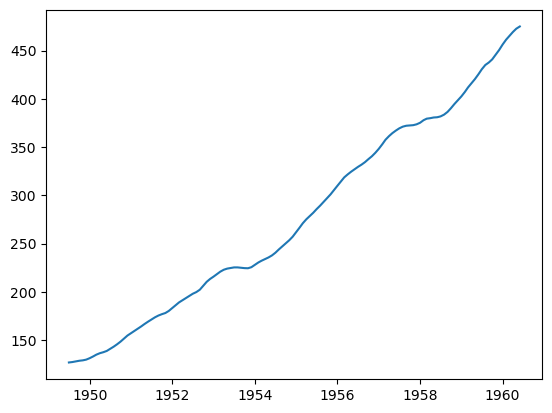

In [23]:
# Plotando a tendência

plt.plot(tendencia)
plt.show()

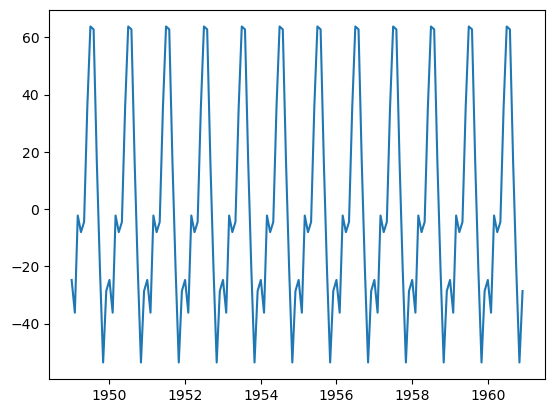

In [24]:
# Plotando a sazonalidade

plt.plot(sazonal)
plt.show()

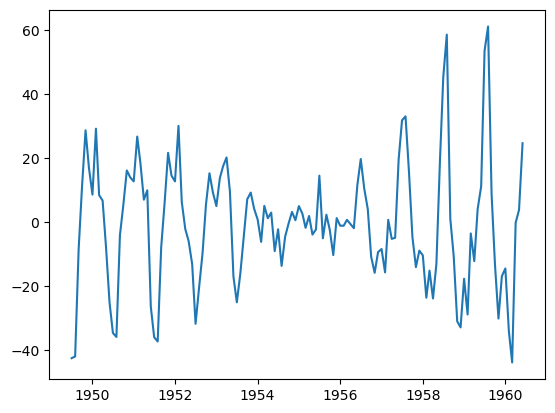

In [25]:
# Plotando a aleatoriedade

plt.plot(aleatorio)
plt.show()

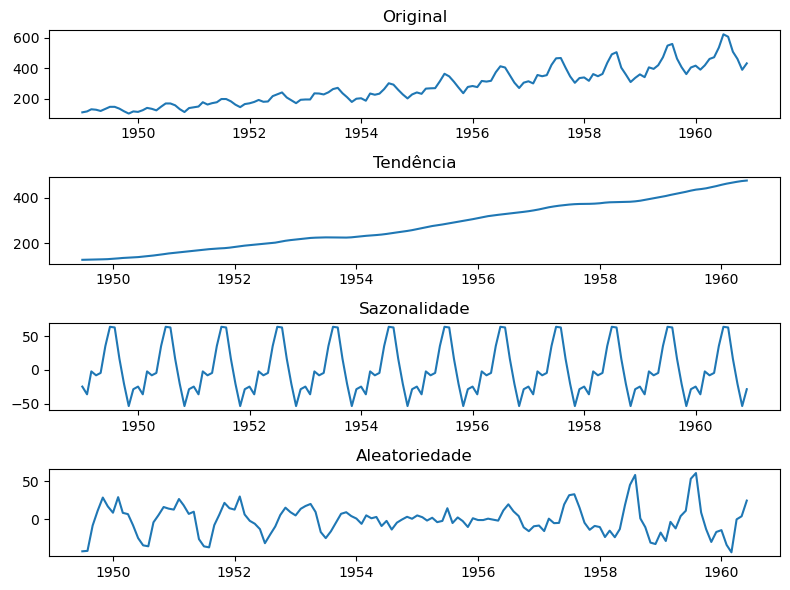

In [26]:
# Plotando todos os valores em um único gráfico

plt.figure(figsize = (8,6))

ax1 = plt.subplot(4,1,1)
plt.plot(ts)
ax1.title.set_text('Original')

ax2 = plt.subplot(4,1,2)
plt.plot(tendencia)
ax2.title.set_text('Tendência')

ax3 = plt.subplot(4,1,3)
plt.plot(sazonal)
ax3.title.set_text('Sazonalidade')

ax4 = plt.subplot(4,1,4)
plt.plot(aleatorio)
ax4.title.set_text('Aleatoriedade')

plt.tight_layout()

plt.show()

In [27]:
#ARIMA
import matplotlib.pylab as plab
import pmdarima.arima

In [ ]:
# Criando modelo ARIMA para realizar previsões

stepwise_model = pmdarima.arima.auto_arima(base, start_p=1, start_q=1,start_d=0, start_P=0, max_p=6, max_q=6, m=12, seasonal=True, trace=True, stepwise=True)

In [30]:
print(stepwise_model.aic())

1019.1780567487631


In [ ]:
stepwise_model2 = pmdarima.arima.auto_arima(base, start_p=1, start_q=1,start_d=0, start_P=0, max_p=6, max_q=6, m=12, seasonal=True, trace=True, stepwise=False)

In [32]:
print(stepwise_model2.aic())

1012.9907964636923


In [34]:
# Dividindo a base de dados entre treino e teste

train = base.loc['1949':'1959']
teste = base.loc['1960':]

In [35]:
train

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1959-08-01,559
1959-09-01,463
1959-10-01,407


In [36]:
teste

,#Passengers
Month,
1960-01-01,417
1960-02-01,391
1960-03-01,419
1960-04-01,461
1960-05-01,472
1960-06-01,535
1960-07-01,622
1960-08-01,606
1960-09-01,508


In [37]:
# Treinando o modelo

stepwise_model.fit(train)

ARIMA(order=(0, 1, 1), scoring_args={}, seasonal_order=(2, 1, 0, 12),
      suppress_warnings=True, with_intercept=False)

In [47]:
# Realizando a previsão dos dados

future_forecast = stepwise_model.predict(n_periods=12)

In [48]:
future_forecast

1960-01-01    421.153373
1960-02-01    401.605753
1960-03-01    462.083577
1960-04-01    450.826711
1960-05-01    475.124360
1960-06-01    529.774276
1960-07-01    605.741141
1960-08-01    618.774117
1960-09-01    516.769043
1960-10-01    463.571231
1960-11-01    417.168988
1960-12-01    458.049056
Freq: MS, dtype: float64

In [49]:
future_forecast = pd.DataFrame(future_forecast, index = teste.index, columns=['#Passengers (prediction)'])

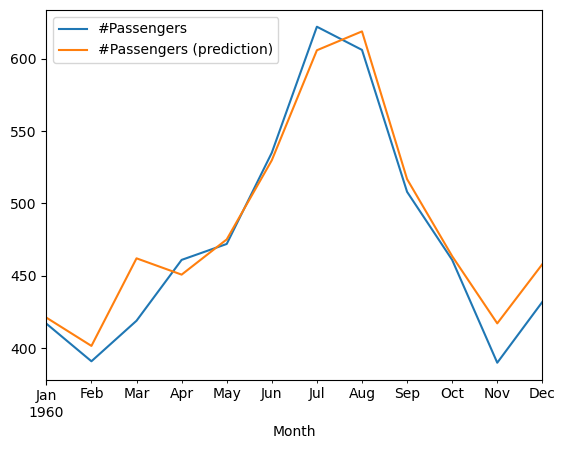

In [51]:
#Comparando a previsão com os dados reais

pd.concat([teste, future_forecast], axis=1).plot()
plt.show()

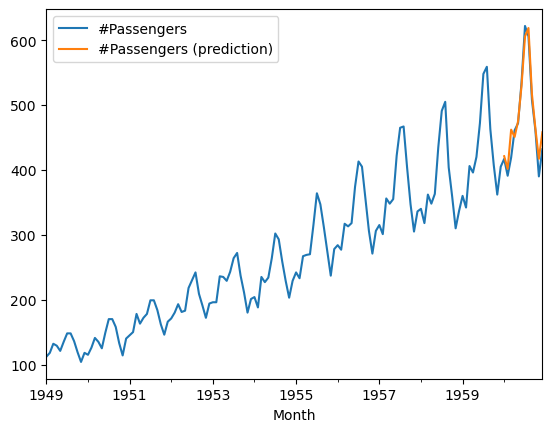

In [53]:
# Comparando a previsão com os dados de teste
pd.concat([base, future_forecast], axis=1).plot()
plt.show()